In [102]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [95]:
os.environ['PROJ_LIB'] = '/Users/himanshuagarwal/anaconda3/envs/mentproject/share/proj/'

In [96]:
from mpl_toolkits.basemap import Basemap

In [3]:
df = pd.read_csv("/Users/himanshuagarwal/BirdProject/Prev_Data_collected/BirdsData-09-02-2019.csv")

In [4]:
df.

,Date,Origin_Dist,Time,battery_level,captive,code,estimated_range,id,latitude,longitude,model,nest_id
0,9/2/19,1.029263,13:53:03,74,False,NaN,9042,a42e0b12-4c2d-465f-8852-2054b6711db8,38.931624,-77.111904,bd,NaN
1,9/2/19,1.127348,13:53:03,65,False,NaN,7946,15de1054-c628-4134-96a2-e0d5a241fa62,38.934411,-77.072697,bd,NaN
2,9/2/19,1.174931,13:53:03,21,False,NaN,2603,e75f6cfa-a9d8-4e5a-9e21-3c46a0dcede3,38.930597,-77.072770,bd,NaN
3,9/2/19,1.219829,13:53:03,24,False,NaN,2877,e9f70383-80a9-4808-b884-f73c52f05a27,38.950114,-77.080319,bd,NaN
4,9/2/19,1.225686,13:53:03,90,False,NaN,10960,b97a71bd-f6c4-4c8c-a32f-8ac5ace09f75,38.927531,-77.073390,bd,NaN


In [13]:
print(df.head().index)

RangeIndex(start=0, stop=5, step=1)


In [18]:
df = df[0:1062]

In [20]:
X = df[['latitude', 'longitude']].values

In [28]:
X.shape

(1062, 2)

In [21]:
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]

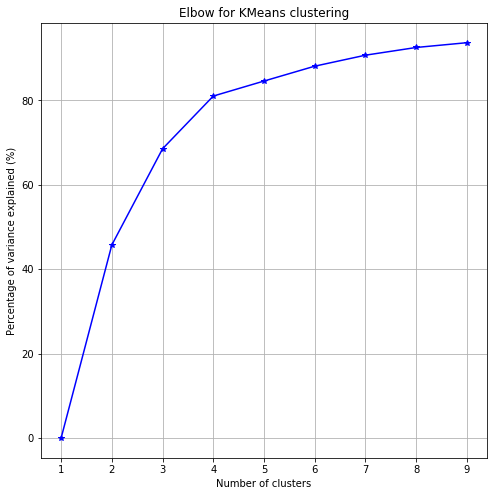

In [26]:
def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)

In [116]:

def plot_stations_map(ax, stns):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['latitude'])
    lon = list(stns['longitude'])
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='cass',resolution='i')

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()    
    
    # plot points
    clist = list(stns['cluster'].unique())
    if -1 in clist:
        clist.remove(-1)
    k = len(clist)
    colors = iter(cm.Set1(np.linspace(0, 1, max(10, k))))
    for i in range(k):
        color = next(colors)
        df = stns.loc[stns['cluster'] == clist[i]]        
        #print("Cluster {} has {} samples.".format(clist[i], df.shape[0]))
        
        # convert lat and lon to map projection coordinates
        lons, lats = m(list(df['longitude']), list(df['latitude']))        
        ax.scatter(lons, lats, marker = 'o', color=color, edgecolor='gray', zorder=5, alpha=1.0, s=15)

/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/himanshua

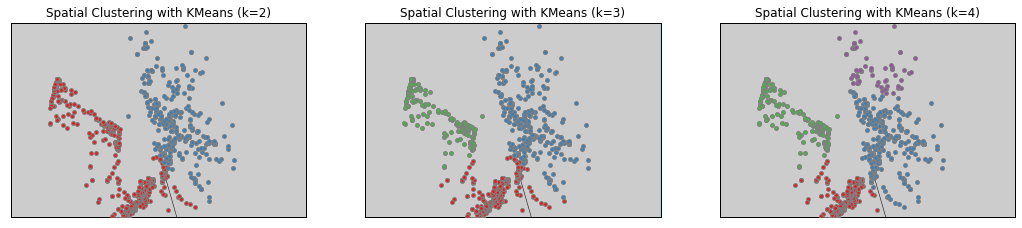

In [117]:
k = [2, 3, 4]
n = len(k)
plt.subplots(nrows=1, ncols=3, figsize=(18,15))

for i in range(n):
    est = kmean[k[i]-1]
    df['cluster'] = est.predict(X).tolist()
    
    ax = plt.subplot(1, 3, i+1)
    ax.set_title("Spatial Clustering with KMeans (k={})".format(k[i]))

    plot_stations_map(ax, df)

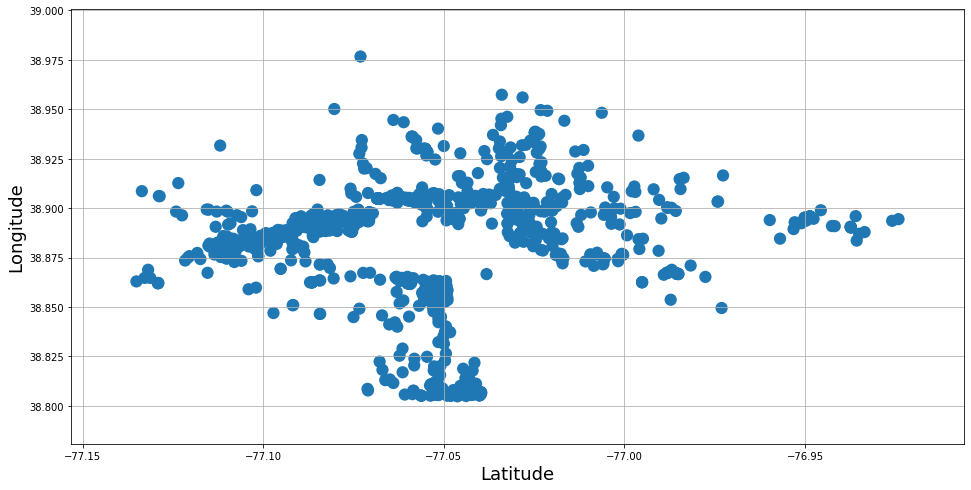

In [71]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df['longitude'], df['latitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()

In [74]:
kmeans_4 = KMeans(n_clusters=4)
y_kmeans = kmeans_4.fit_predict(X)

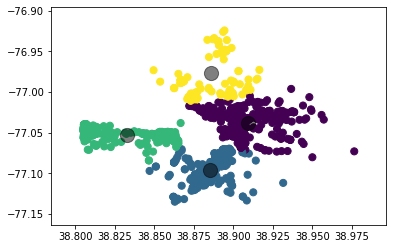

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [79]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['/Users/himanshuagarwal/anaconda3/envs/mentproject/lib/python3.7/site-packages/mpl_toolkits'])